<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/HW6/DSPS_gaussian_process_regression_Savery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.datasets import elnino

In [2]:
!pip install george
import george
from george import kernels
print('Done')

Done


# NB

Code skeletons are provided for you, but you may change them as you please.

It is not required, but I suggest you adjust and complete the given docstrings as you make changes.

# 0. The Dataset

We'll be using the El Niño dataset from the `statsmodels` package. This first cell of code loads the dataset easily for you. Read the description of the dataset [here](https://www.statsmodels.org/devel/datasets/generated/elnino.html).

In [3]:
def load_elnino_dataset():
    """
    Downloads the El Niño dataset from the statsmodels package.

    Parameters
    ----------
    None

    Returns
    -------
    df : pd.DataFrame
        A Pandas dataframe containing the raw data of the El Niño dataset
        directly from the statsmodels package.
    """
    df = elnino.load_pandas().data
    return df

df = load_elnino_dataset()

In [4]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30


In [5]:
df.iloc[0][1]

23.11

In [6]:
#Number of rows
df.shape[0]

61

In [7]:
def flatten_dataset(df):
    """
    Flatten the data in the dataframe.

    The sea surface temperature data is stored in a somewhat peculiar way in
    this dataset. The data has rows for every year between 1950 and 2010, and
    it has 12 columns for each month of each year.

    Re-order the data such that there is one 1-dim array for the temperature data.

    Parameters
    ----------
    df : pd.DataFrame
        The Pandas dataframe of the El Niño – Sea Surface Temperature dataset
        from the statsmodels package.

    Returns
    -------
    time : array-like
        A shape (732,) array containing every month from January 1950 to
        December 2010. You may encode the time as an integer
        (`time = [0, 1, 2, 3, ...]), as strings (`time = ['January 1950', ...])
        or however else you like.
    data : array-like
        A shape (732,) array containing the sea surface temperature for every
        month between January 1950 to December 2010.
    """
    month_counter = 0
    months_since_1950 = []
    surface_temp = []

    for i in range(0,df.shape[0]):

      for j in range(1,13):

        months_since_1950.append(month_counter)
        surface_temp.append(df.iloc[i][j])
        month_counter += 1

    months_array = np.asarray(months_since_1950)
    surface_temp_array = np.asarray(surface_temp)

    return months_array, surface_temp_array


In [8]:
x, y = flatten_dataset(df)

print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

# 1. Visualize

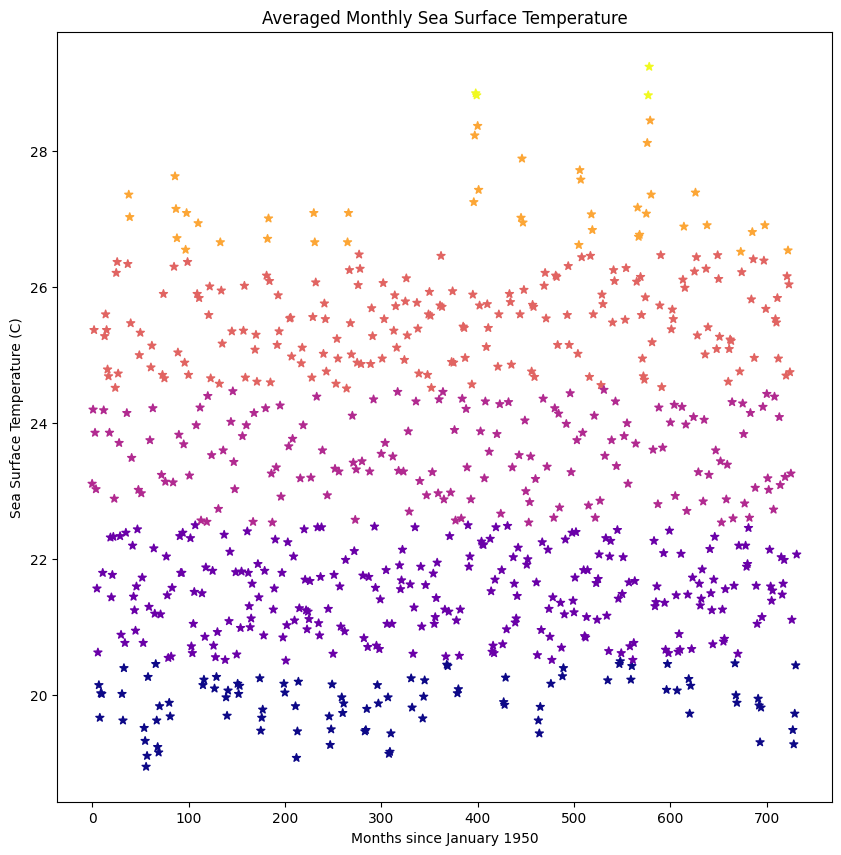

In [9]:
def visualize(df):
    """
    Visualize the El Niño – Sea Surface Temperature dataset.

    You decide the most appropriate way to visualize the dataset.

    Parameters
    ----------
    df : pd.DataFrame
        The Pandas dataframe of the El Niño – Sea Surface Temperature dataset
        from the statsmodels package.

    Returns
    -------
    None
    """
    x, y = flatten_dataset(df)

    colors = np.zeros(len(y))

    for i in range(0,len(y)):

      if round(y[i]) <= 20:
        colors[i] = 1
      elif round(y[i]) <= 22:
        colors[i] = 2
      elif round(y[i]) <= 24:
        colors[i] = 3
      elif round(y[i]) <= 26:
        colors[i] = 4
      elif round(y[i]) <= 28:
        colors[i] = 5
      else:
        colors[i] = 6


    plt.subplots(figsize = (10,10))
    plt.scatter(x, y, c = colors, marker = '*', cmap = 'plasma', label = 'Sea Surface Temperature')
    plt.xlabel('Months since January 1950')
    plt.ylabel('Sea Surface Temperature (C)')
    plt.title('Averaged Monthly Sea Surface Temperature')
    plt.show()


visualize(df)

### Figure 1:

This graph is a visualization of the averged monthly sea surface temperature from January 1950 to December 2010. I have added a color map to highlight the different temperature bands. This was done by setting specific colors for increments of 2 degrees from 20 Celcius to 28 Celcius, then rounding the temperature and placing it into its respective bin.

# 2. Gaussian Process Regression (GPR)

In [10]:
def get_interpolated_time():
    """
    We are going to use GPR to interpolate the sea surface temperatures for
    every day between January 1st 1950 and December 1st 2030. There are 29,555
    days between those two dates (inclusive). Create and return an array of
    times for each day in that timeframe.

    Paramters
    ---------
    None

    Returns
    -------
    interp_time : array-like
        A shape (29555,) array, the times we want to interpolate. Encoded the
        same way you did before or any way you like.
    """
    days = np.arange(0, 29555, 1)

    return days

t = get_interpolated_time()

print(t[-1])
print(len(t))

29554
29555


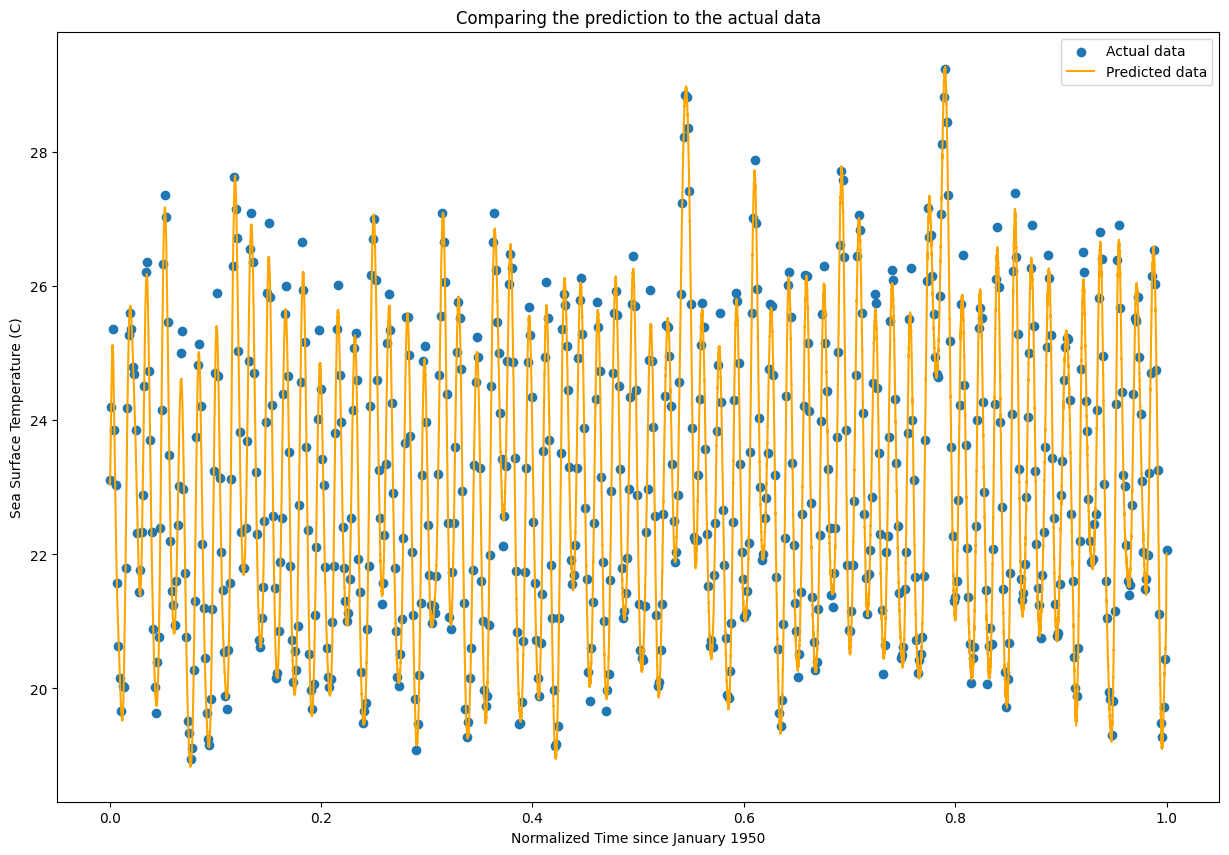

In [11]:
def gaussian_process_regression(time, data, interp_time, initial_guess):
    """
    Using the george package, its documentation and startup guide, implement a
    gaussian process regressor on `time` and `data`. Then, use it to predict
    on `interp_time`.

    It will be helpful for you to write code to visualize the result of this
    initial model, but not necessary for the assignment.

    Parameters
    ----------
    time : array-like
        A shape (732,) array, times between 1950 and 2010, sampled every month.
    data : array-like
        A shape (732,) array, sea surface temperatures every month between 1950
        and 2010.
    interp_time : array-like
        A shape (29555,) array, times between 1950 and 2030, sampled every day.
    initial_guess : array-like or float
        The intial guess for the gaussian process that you make. The number of
        parameters will depend on the kernel you choose.

    Returns
    -------
    None
    """
    x = time
    y = data
    t = interp_time
    norm_t = t/t.max()
    norm_x = x/x.max()

    kernel = np.var(y) + kernels.ExpSquaredKernel(initial_guess)

    gp = george.GP(kernel)
    gp.compute(norm_x)

    x_pred = np.linspace(0, norm_t.max(), len(norm_t))
    pred, pred_var = gp.predict(y, x_pred, return_var=True)

    plt.subplots(figsize = (15,10))
    plt.scatter(norm_x, y, label = 'Actual data')
    plt.plot(norm_t, pred, c = 'orange', label = 'Predicted data')
    plt.title('Comparing the prediction to the actual data')
    plt.xlabel('Normalized Time since January 1950')
    plt.ylabel('Sea Surface Temperature (C)')
    #plt.xlim(0,23000)
    plt.legend()
    plt.show()


initial_guess = 0.0001
gaussian_process_regression(x, y, t, initial_guess)

### Figure 2:
This plot shows a Gaussian regression fit to the actual measured sea surface temperature in the data. For the fit, I used the ExpSquaredKernel from the george package which was then added to the np.var(y) equation where y was the recorded seas surface temperatures. The model fit is plotted for the interpolated time from 1950 to 2010, as the prediction becomes a flat line after the interpolated time has advanced past the recorded data.

# 3. Optimize

In [12]:
from scipy.optimize import minimize

In [13]:
#From the George tutorial on using optimize:

def optimize(x, y, initial_guess):
    """
    Using any optimization method you choose, find the optimal set of
    hyperparameters for your model.

    Print the results of your optimization.

    Parameters
    ----------
    ...

    Returns
    -------
    None
    """
    norm_x = x/x.max()
    kernel = np.var(y) + kernels.ExpSquaredKernel(initial_guess)
    gp = george.GP(kernel, white_noise = 1e-8)
    gp.compute(norm_x)

    def neg_ln_like(p):
      gp.set_parameter_vector(p)
      return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
      gp.set_parameter_vector(p)
      return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)

    gp.set_parameter_vector(result.x)
    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    return gp.set_parameter_vector(result.x)



In [14]:
initial_guess2 = 0.0001
optimize(x, y, initial_guess2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1312.5023838631923
        x: [ 6.279e+00 -1.164e+01]
      nit: 12
      jac: [ 3.580e-08 -1.741e-07]
 hess_inv: [[ 1.941e+00  7.246e-04]
            [ 7.246e-04  5.076e-03]]
     nfev: 16
     njev: 16

Final ln-likelihood: -1312.50


# 4. Visualize your model

I was having trouble with getting the graphing function to work with the optimization function. So I just pulled everything need to plot into a single cell.

In [15]:
#Converting months to match days

days_of_month = x * 31

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1312.5023838632408
        x: [ 6.279e+00 -1.164e+01]
      nit: 11
      jac: [-1.185e-07  8.293e-06]
 hess_inv: [[ 2.006e+00 -7.862e-04]
            [-7.862e-04  5.252e-03]]
     nfev: 29
     njev: 29

Final ln-likelihood: -1312.50


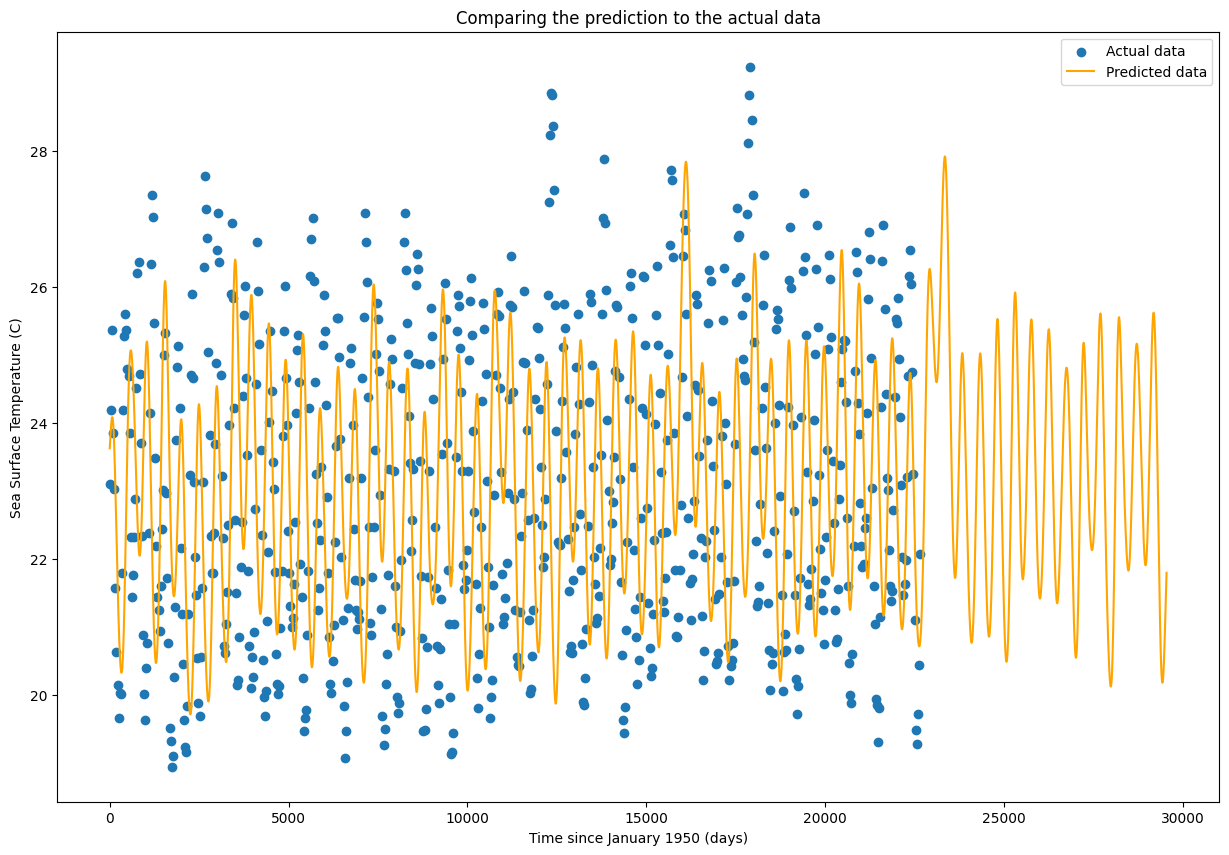

In [16]:
initial_guess = 10
norm_t = t/t.max()
norm_x = x/x.max()
kernel = np.var(y) + kernels.ExpSquaredKernel(initial_guess)
gp = george.GP(kernel, white_noise = 1e-8)
gp.compute(norm_x)

def neg_ln_like(p):
  gp.set_parameter_vector(p)
  return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
  gp.set_parameter_vector(p)
  return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)

gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))



x_pred = np.linspace(0, norm_t.max(), len(norm_t))
pred, pred_var = gp.predict(y, x_pred, return_var=True)

plt.subplots(figsize = (15,10))
plt.scatter(days_of_month, y, label = 'Actual data')
plt.plot(t, pred, c = 'orange', label = 'Predicted data')
plt.title('Comparing the prediction to the actual data')
plt.xlabel('Time since January 1950 (days)')
plt.ylabel('Sea Surface Temperature (C)')
plt.legend()
plt.show()

### Figure 3

This is a plot of the best fit of interpolated model to the monthly averaged data. The fit doesn't like the extremes, but seems to follow the general pattern in the change of the temperature. I tried several starting points for my initial guess when optimizing, which always returned the same x list. This suggests to me the need for a different kernel when preforming these regressions on the data. However, I don't have enough time to figure out a better kernel.